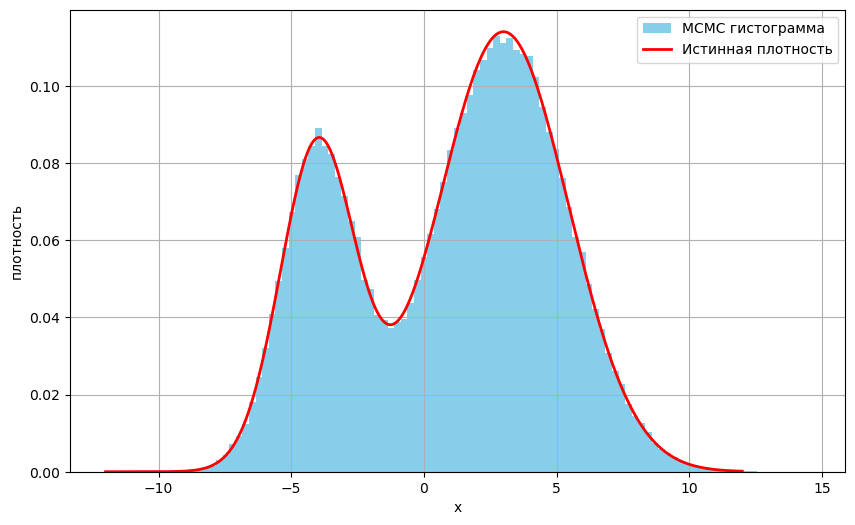

In [8]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
def metropolis(start, value, proposal, niter, nburn=0, sigma=1.0):
    current = start
    post = [current]
    for i in range(niter):
        proposed = proposal(current, sigma)
        p = value(proposed) / value(current)
        if np.random.rand() < p:
            current = proposed
        post.append(current)
    return np.array(post[nburn:])
def value(x):
    return 0.3 * stats.norm.pdf(x, loc=-4, scale=np.sqrt(2)) + 0.7 * stats.norm.pdf(x, loc=3, scale=np.sqrt(6))
def proposal(current, sigma):
    return current + sigma * np.random.randn()
np.random.seed(42)
post = metropolis(start=0, value=value, proposal=proposal, niter=500000, nburn=50000, sigma=7)
x = np.linspace(-12, 12, 1000)
y_true = 0.3 * stats.norm.pdf(x, -4, np.sqrt(2)) + 0.7 * stats.norm.pdf(x, 3, np.sqrt(6))
plt.figure(figsize=(10, 6))
plt.hist(post, bins=100, density=True, color='skyblue', label='MCMC гистограмма')
plt.plot(x, y_true, 'r-', lw=2, label='Истинная плотность')
plt.xlabel('x')
plt.ylabel('плотность')
plt.legend()
plt.grid(True)
plt.show()


Среднее количество единиц на 10x10 графе: 23.6041


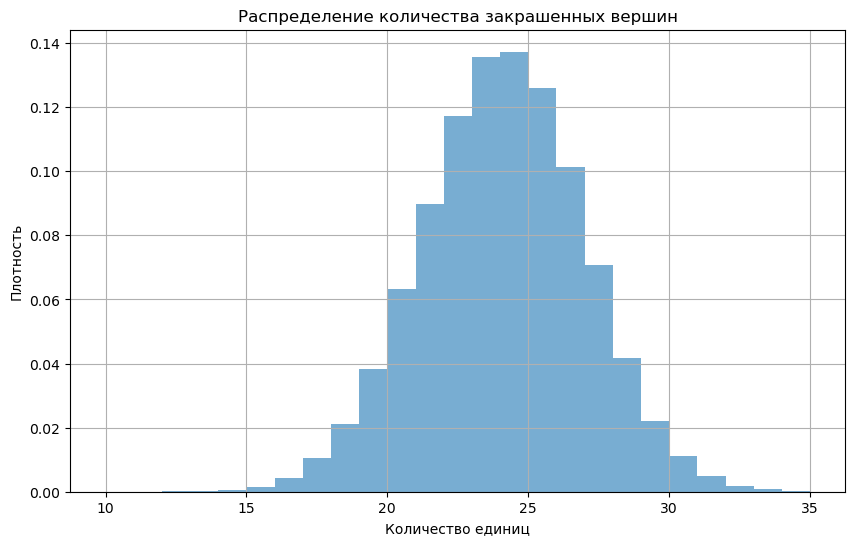

In [9]:
import numpy as np
import matplotlib.pyplot as plt
def is_valid_configuration(config, i, j, new_value):
    n, m = config.shape
    if new_value == 0:
        return True
    for di, dj in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
        ni, nj = i + di, j + dj
        if 0 <= ni < n and 0 <= nj < m and config[ni, nj] == 1:
            return False
    return True

def metropolis_graph(n, m, niter, nburn=0):
    config = np.zeros((n, m), dtype=int)
    for i in range(n):
        for j in range(m):
            if is_valid_configuration(config, i, j, 1) and np.random.rand() < 0.5:
                config[i, j] = 1
    counts = []  
    for _ in range(niter):
        i, j = np.random.randint(0, n), np.random.randint(0, m)
        new_value = 1 - config[i, j]
        if is_valid_configuration(config, i, j, new_value):
            if np.random.rand() < 0.5:
                config[i, j] = new_value
        if _ >= nburn:
            counts.append(np.sum(config))
    return counts

n, m = 10, 10
niter = 500000
nburn = 100000
counts_10x10 = metropolis_graph(n, m, niter, nburn)
mean_10x10 = np.mean(counts_10x10)
print(f"\nСреднее количество единиц на 10x10 графе: {mean_10x10:.4f}")
plt.figure(figsize=(10, 6))
plt.hist(counts_10x10, bins=range(min(counts_10x10), max(counts_10x10)+1), density=True, alpha=0.6)
plt.title('Распределение количества закрашенных вершин')
plt.xlabel('Количество единиц')
plt.ylabel('Плотность')
plt.grid(True)
plt.show()